# Sinusoidal Seasonal Montecarlo

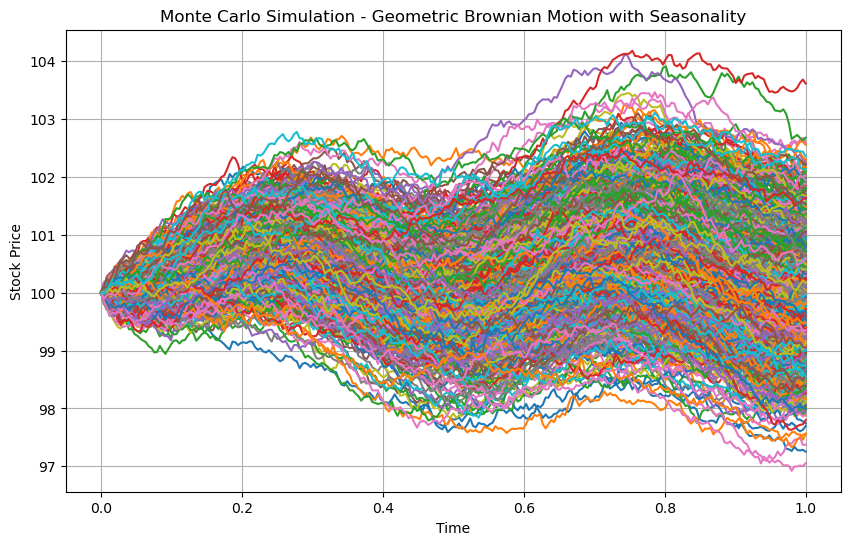

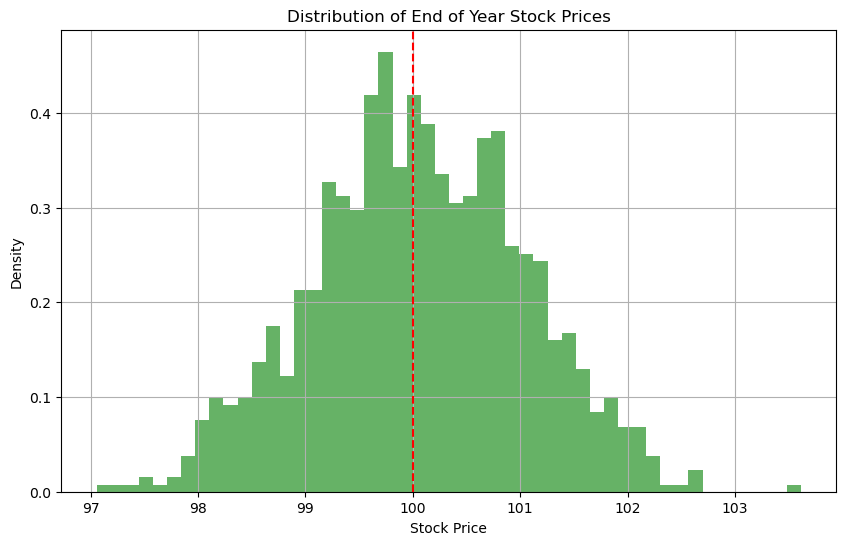

Theoretical Mean: 100.00000      Monte Carlo Mean: 100.06258


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion_with_seasonality(S0, mu, sigma, T, N, num_simulations):
    dt = T / N
    t = np.linspace(0, T, N+1)
    S = np.zeros((N+1, num_simulations))
    S[0] = S0
    for i in range(1, N+1):
        z = np.random.standard_normal(num_simulations)
        
        
        seasonal_variation = A*np.sin(2 * np.pi * i / (P*(N + 1)))  # Seasonal variation term
        
        
        S[i] = S[i-1] * np.exp(((mu + seasonal_variation) - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return t, S


#Seasonality Parameters (Fit to a fourier)
A=0.05 #Amplitude
P= 1/2 #Period (Yearly)                                      

# Montecarlo Parameters
S0 = 100  # initial stock price
sigma = 0.01  # volatility
T = 1  # time horizon (in years)
N = 252  # trading days a year

mu = 0.0  # Drift parameter

num_simulations = 1000  # number of simulations

# Run simulation with seasonality
t, S = geometric_brownian_motion_with_seasonality(S0, mu, sigma, T, N, num_simulations)

# Save the data
np.savetxt(f'RawData/seasonal_montecarlo_data_{S0}_{sigma}_{mu}_{num_simulations}__{A}_{P}.txt', S, delimiter=',')

# Plot simulations
plt.figure(figsize=(10, 6))
plt.plot(t, S)
plt.title('Monte Carlo Simulation - Geometric Brownian Motion with Seasonality')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

theoretical_mean = S_T = S0 * np.exp((mu) * T) #FIX ME! INCLUDE THEORETICAL SEASONALITY
monte_carlo_mean = np.mean(S[-1])

# Plot distribution of the final stock prices
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribution of End of Year Stock Prices')
plt.axvline(x=theoretical_mean, color='r', linestyle='--', label='Theoretical Mean')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


print(f"Theoretical Mean: {theoretical_mean:.5f}      Monte Carlo Mean: {monte_carlo_mean:.5f}")

# Regular Montecarlo

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(S0, mu, sigma, T, N, num_simulations):
    dt = T / N
    t = np.linspace(0, T, N+1)
    S = np.zeros((N+1, num_simulations))
    S[0] = S0
    for i in range(1, N+1):
        z = np.random.standard_normal(num_simulations)
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return t, S

# Parameters
S0 = 100  # initial stock price
sigma = 0.2  # volatility
T = 1  # time horizon (in years)
N = 252  # trading days a year
mu = 2 #Drift parameter
num_simulations = 1000  # number of simulations

# Run simulation
t, S = geometric_brownian_motion(S0, mu, sigma, T, N, num_simulations)

# Save the data
np.savetxt(f'RawData/montecarlo_data_{S0}_{sigma}_{mu}_{num_simulations}.csv', S, delimiter=',')

# Plot simulations
plt.figure(figsize=(10, 6))
plt.plot(t, S)
plt.title('Monte Carlo Simulation - Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


# Plot distribution of the final stock prices
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribution of End of Year Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

theoretical_mean = S_T = S0 * np.exp((mu) * T)
monte_carlo_mean = np.mean(S[-1])
print(f"Theoretical Mean: {theoretical_mean:.5f}      Monte Carlo Mean: {monte_carlo_mean:.5f}")



UsageError: Line magic function `%hide` not found.
